In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from SecretColors import Palette, ColorMap
import numpy as np

In [2]:
files = [
    'bench_results0.csv',
    'bench_results1.csv',
    'bench_results2.csv',
    'bench_results3.csv',
    'bench_results4.csv',
    'bench_results5.csv',
    'bench_results6.csv',
    'bench_results7.csv',
]

dfs = []  # Not a depth-first search 😞
for file in files:
    df = pd.read_csv(file)
    df['filename'] = file
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

p = Palette("material")
color_map = ColorMap(matplotlib, p)

dense_files = [
    'bench_results0.csv',
    'bench_results1.csv',
    'bench_results2.csv',
    'bench_results3.csv',
]

In [3]:
font_path = "./Alegreya-VariableFont_wght.ttf"

matplotlib.font_manager.fontManager.addfont(font_path)
prop = matplotlib.font_manager.FontProperties(fname=font_path)

matplotlib.rcParams["legend.facecolor"] = p.gray(shade=10)
matplotlib.rcParams["legend.edgecolor"] = p.gray(shade=10)
matplotlib.rcParams["legend.markerscale"] = 5
matplotlib.rcParams["font.family"] = prop.get_name()

In [4]:
def get_colors(algo):
    if algo != 'dinic':
        return color_map.oranges(starting_shade=20, is_reversed=True)
    else:
        return color_map.blues(starting_shade=20, is_reversed=True)


def get_color(algo, shade=80):
    if algo != 'dinic':
        return p.orange(shade=shade)
    else:
        return p.blue(shade=shade)

In [5]:
def save(name):
    plt.savefig('figures/' + name + '.pgf',
                backend='pgf',
                transparent=True,
                bbox_inches='tight',
                pad_inches=0)

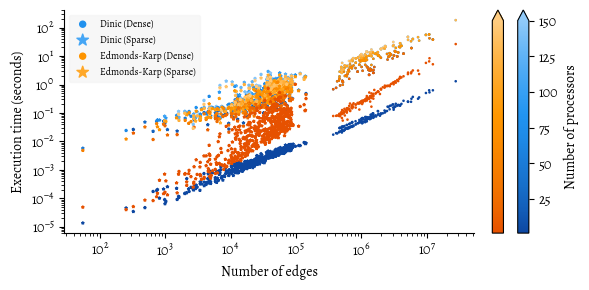

In [6]:
plt.figure(figsize=(6, 3))
algorithms = df['algorithm'].unique()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for algo in algorithms:
    subset = df[(df['algorithm'] == algo) & (df['filename'].isin(dense_files))]
    scatter = plt.scatter(subset['m'],
                          subset['time'],
                          c=subset['procs'],
                          cmap=get_colors(algo),
                          label=f"{algo} (dense)".title(),
                          marker='.',
                          s=3)
    subset = df[(df['algorithm'] == algo)
                & (~df['filename'].isin(dense_files))]
    scatter = plt.scatter(subset['m'],
                          subset['time'],
                          c=subset['procs'],
                          cmap=get_colors(algo),
                          label=f"{algo} (sparse)".title(),
                          marker='*',
                          s=3)

norm = plt.Normalize(df['procs'].min(), df['procs'].max())
for i, algo in enumerate(algorithms):
    sm = plt.cm.ScalarMappable(cmap=get_colors(algo), norm=norm)
    if i == 0:
        plt.colorbar(sm,
                     label="Number of processors",
                     fraction=0.046,
                     pad=0.01,
                     extend='max',
                     ax=ax)
    else:
        plt.colorbar(sm,
                     fraction=0.046,
                     pad=0.04,
                     extend='max',
                     ticks=[],
                     ax=ax)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of edges")
plt.ylabel("Execution time (seconds)")
plt.legend()

plt.tight_layout()
plt.legend(prop={"size": 7})
save('time_by_algorithm')

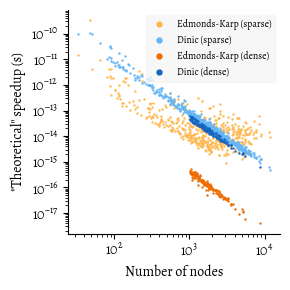

In [7]:
plt.figure(figsize=(3, 3))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

labels = [
    'Edmonds-Karp (sparse)', 'Dinic (sparse)', 'Edmonds-Karp (dense)',
    'Dinic (dense)'
]

frames = [
    (df['algorithm'] == 'edmonds-karp')
    & (df['mode'] == 'seq') & (~df['filename'].isin(dense_files)),
    #
    (df['algorithm'] == 'dinic') & (df['mode'] == 'seq') &
    (~df['filename'].isin(dense_files)),
    #
    (df['algorithm'] == 'edmonds-karp')
    & (df['mode'] == 'seq') & (df['filename'].isin(dense_files)),
    #
    (df['algorithm'] == 'dinic') & (df['mode'] == 'seq') &
    (df['filename'].isin(dense_files))
    #
]

complexity = [
    lambda df: df['m']**2 * df['n'],
    lambda df: df['n']**2 * df['m'],
    lambda df: df['m']**2 * df['n'],
    lambda df: df['n']**2 * df['m'],
]

shades = [30, 30, 80, 80]

plt.xscale("log")
plt.yscale("log")

algorithm = [
    'edmonds-karp',
    'dinic',
    'edmonds-karp',
    'dinic',
]

data = zip(frames, complexity, shades, algorithm, labels)
for (filt, compl, shade, algo, label) in data:
    subset = df[filt]
    plt.scatter(subset['n'],
                subset['time'] / compl(subset),
                c=get_color(algo, shade=shade),
                s=2,
                marker='.',
                label=label)

plt.xlabel("Number of nodes")
plt.ylabel("\"Theoretical\" speedup (s)")
plt.tight_layout()
plt.legend(prop={"size": 7})
save('ratio_expected_sequential')

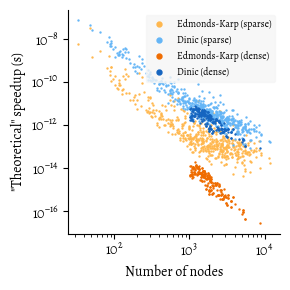

In [8]:
plt.figure(figsize=(3, 3))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

labels = [
    'Edmonds-Karp (sparse)', 'Dinic (sparse)', 'Edmonds-Karp (dense)',
    'Dinic (dense)'
]

frames = [
    (df['algorithm'] == 'edmonds-karp')
    & (df['mode'] == 'par') & (~df['filename'].isin(dense_files)),
    #
    (df['algorithm'] == 'dinic') & (df['mode'] == 'par') &
    (~df['filename'].isin(dense_files)),
    #
    (df['algorithm'] == 'edmonds-karp')
    & (df['mode'] == 'par') & (df['filename'].isin(dense_files)),
    #
    (df['algorithm'] == 'dinic') & (df['mode'] == 'par') &
    (df['filename'].isin(dense_files))
    #
]

complexity = [
    lambda df: df['m']**2 * df['n'],
    lambda df: df['n']**2 * df['m'],
    lambda df: df['m']**2 * df['n'],
    lambda df: df['n']**2 * df['m'],
]

shades = [30, 30, 80, 80]

plt.xscale("log")
plt.yscale("log")

algorithm = [
    'edmonds-karp',
    'dinic',
    'edmonds-karp',
    'dinic',
]

data = zip(frames, complexity, shades, algorithm, labels)
for (filt, compl, shade, algo, label) in data:
    subset = df[filt]
    plt.scatter(subset['n'],
                subset['time'] / compl(subset),
                c=get_color(algo, shade=shade),
                marker='.',
                s=2,
                label=label)

plt.xlabel("Number of nodes")
plt.ylabel("\"Theoretical\" speedup (s)")
plt.tight_layout()
plt.legend(prop={"size": 7})
save('ratio_expected_parallel')

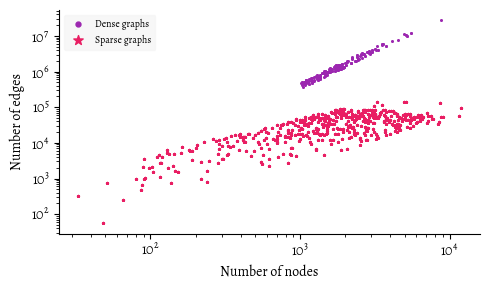

In [9]:
plt.figure(figsize=(5, 3))

plt.xscale("log")
plt.yscale("log")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

dense = df[(df['filename'].isin(dense_files))]
sparse = df[(~df['filename'].isin(dense_files))]

plt.scatter(dense['n'],
            dense['m'],
            c=p.purple(),
            marker='.',
            s=2,
            label='Dense graphs')
plt.scatter(sparse['n'],
            sparse['m'],
            c=p.pink(),
            marker='*',
            s=2,
            label='Sparse graphs')
plt.xlabel('Number of nodes')
plt.ylabel('Number of edges')
plt.tight_layout()
plt.legend(prop={"size": 7})
save('graph_generation')

In [10]:
df_seq = df[df["mode"] == "seq"].set_index(["n", "m", "algorithm"])
df_par = df[df["mode"] == "par"].set_index(["n", "m", "algorithm"])

speedup_records = []

for key, row in df_par.iterrows():
    n, m, algo = key
    if key in df_seq.index:
        speedup = df_seq.loc[key]["time"] / row["time"]
        speedup_records.append({
            "n": n,
            "m": m,
            "algorithm": algo,
            "procs": row["procs"],
            "speedup": speedup,
            "dense": row['filename'] in dense_files
        })

speedup_df = pd.DataFrame(speedup_records)

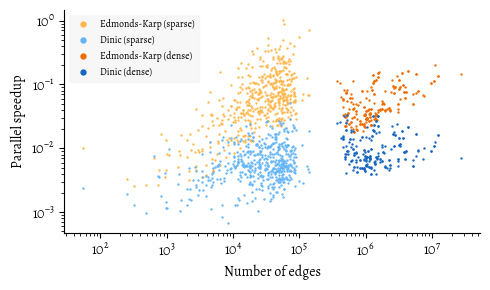

In [11]:
plt.figure(figsize=(5, 3))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

labels = [
    'Edmonds-Karp (sparse)', 'Dinic (sparse)', 'Edmonds-Karp (dense)',
    'Dinic (dense)'
]

frames = [
    (speedup_df['algorithm'] == 'edmonds-karp')
    & (~speedup_df['dense']),
    #
    (speedup_df['algorithm'] == 'dinic') & (~speedup_df['dense']),
    #
    (speedup_df['algorithm'] == 'edmonds-karp')
    & (speedup_df['dense']),
    #
    (speedup_df['algorithm'] == 'dinic') & (speedup_df['dense'])
    #
]

shades = [30, 30, 80, 80]

plt.xscale("log")
plt.yscale("log")

algorithm = [
    'edmonds-karp',
    'dinic',
    'edmonds-karp',
    'dinic',
]

data = zip(frames, shades, algorithm, labels)
for (filt, shade, algo, label) in data:
    subset = speedup_df[filt]
    plt.scatter(subset['m'],
                subset['speedup'],
                c=get_color(algo, shade=shade),
                marker='.',
                s=2,
                label=label)

plt.xlabel("Number of edges")
plt.ylabel("Parallel speedup")
plt.tight_layout()
plt.legend(prop={"size": 7})
save('parallel_speedup')

In [12]:
dense = df[df['filename'].isin(dense_files)]
sparse = df[~df['filename'].isin(dense_files)]

In [13]:
dense.describe().round()

,idx,n,m,w,seed,procs,flow,expected_flow,time,valid
count,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0
mean,77.0,1996.0,2059699.0,50.0,769459.0,47.0,20677.0,20677.0,7.0,1.0
std,40.0,1023.0,2813298.0,28.0,401306.0,49.0,16234.0,16234.0,14.0,0.0
min,1.0,1020.0,369773.0,1.0,10042.0,1.0,458.0,458.0,0.0,1.0
25%,47.0,1356.0,722637.0,26.0,470042.0,1.0,9974.0,9974.0,0.0,1.0
50%,78.0,1705.0,1187210.0,50.0,780042.0,31.0,17660.0,17660.0,3.0,1.0
75%,109.0,2329.0,2251761.0,73.0,1090042.0,87.0,29172.0,29172.0,10.0,1.0
max,150.0,8772.0,27584196.0,100.0,1500042.0,149.0,98396.0,98396.0,183.0,1.0


In [14]:
sparse.describe().round()

,idx,n,m,w,seed,procs,flow,expected_flow,time,valid
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,250.0,2205.0,35460.0,33254.0,2505042.0,40.0,242733.0,242733.0,0.0,1.0
std,144.0,1881.0,25470.0,40940.0,1443734.0,49.0,257423.0,257423.0,0.0,0.0
min,1.0,33.0,55.0,7.0,10042.0,1.0,55.0,55.0,0.0,1.0
25%,126.0,836.0,14390.0,6618.0,1257542.0,1.0,47728.0,47728.0,0.0,1.0
50%,250.0,1722.0,32434.0,20580.0,2505042.0,6.0,148884.0,148884.0,0.0,1.0
75%,375.0,3064.0,53544.0,44200.0,3752542.0,79.0,377648.0,377648.0,0.0,1.0
max,500.0,11890.0,141898.0,337947.0,5000042.0,150.0,1504156.0,1504156.0,3.0,1.0


In [15]:
def dataframe_to_latex(df_dense, df_sparse):
    stats = {
        "Count": {
            "": [df_dense.shape[0], df_sparse.shape[0]]
        },
        "Vertices": {
            "mean": [df_dense['n'].mean(), df_sparse['n'].mean()],
            "st. dev.": [df_dense['n'].std(), df_sparse['n'].std()],
            "min": [df_dense['n'].min(), df_sparse['n'].min()],
            "median": [df_dense['n'].median(), df_sparse['n'].median()],
            "max": [df_dense['n'].max(), df_sparse['n'].max()],
        },
        "Edges": {
            "mean": [df_dense['m'].mean(), df_sparse['m'].mean()],
            "st. dev.": [df_dense['m'].std(), df_sparse['m'].std()],
            "min": [df_dense['m'].min(), df_sparse['m'].min()],
            "median": [df_dense['m'].median(), df_sparse['m'].median()],
            "max": [df_dense['m'].max(), df_sparse['m'].max()],
        },
        "Processors": {
            "mean": [df_dense['procs'].mean(), df_sparse['procs'].mean()],
            "st. dev.": [df_dense['procs'].std(), df_sparse['procs'].std()],
            "min": [df_dense['procs'].min(), df_sparse['procs'].min()],
            "median":
            [df_dense['procs'].median(), df_sparse['procs'].median()],
            "max": [df_dense['procs'].max(), df_sparse['procs'].max()],
        },
        "Flow": {
            "mean": [df_dense['flow'].mean(), df_sparse['flow'].mean()],
            "st. dev.": [df_dense['flow'].std(), df_sparse['flow'].std()],
            "min": [df_dense['flow'].min(), df_sparse['flow'].min()],
            "median": [df_dense['flow'].median(), df_sparse['flow'].median()],
            "max": [df_dense['flow'].max(), df_sparse['flow'].max()],
        },
        "Time (ms)": {
            "mean": [(df_dense['time'] * 10**3).mean(),
                     (df_sparse['time'] * 10**3).mean()],
            "st. dev.": [(df_dense['time'] * 10**3).std(),
                         (df_sparse['time'] * 10**3).std()],
            "min": [(df_dense['time'] * 10**3).min(),
                    (df_sparse['time'] * 10**3).min()],
            "median": [(df_dense['time'] * 10**3).median(),
                       (df_sparse['time'] * 10**3).median()],
            "max": [(df_dense['time'] * 10**3).max(),
                    (df_sparse['time'] * 10**3).max()],
        },
    }

    latex_code = r"""
\begin{table}[b]
    \centering
    \begin{tabular}{|r|c|c|}
      \hline
      \textsc{\textbf{Type of Graph}}
      & \textsc{Dense Graph}
      & \textsc{Sparse Graph}\\
"""
    for key in stats.keys():
        latex_code += f"""
      \\hline
      \\hline
      {key}
        """

        if "" not in stats[key].keys():
            latex_code += r"\hfill"

        for stat, values in stats[key].items():
            if stat == "":
                latex_code += f"      "
            else:
                latex_code += f"      \\textsf{{\\textit{{{stat}}}}}"
            latex_code += (f"&${values[0]:,.0f}$".replace(",", "\\,") +
                           f"&${values[1]:,.0f}$".replace(",", "\\,") +
                           "\\\\\n")

    latex_code += r"""      \hline
    \end{tabular}
    \caption{Statistical results}
    \label{tab:statistical-results}
\end{table}
"""
    return latex_code


print(dataframe_to_latex(dense, sparse))


\begin{table}[b]
    \centering
    \begin{tabular}{|r|c|c|}
      \hline
      \textsc{\textbf{Type of Graph}}
      & \textsc{Dense Graph}
      & \textsc{Sparse Graph}\\

      \hline
      \hline
      Count
              &$737$&$2\,000$\\

      \hline
      \hline
      Vertices
        \hfill      \textsf{\textit{mean}}&$1\,996$&$2\,205$\\
      \textsf{\textit{st. dev.}}&$1\,023$&$1\,881$\\
      \textsf{\textit{min}}&$1\,020$&$33$\\
      \textsf{\textit{median}}&$1\,705$&$1\,722$\\
      \textsf{\textit{max}}&$8\,772$&$11\,890$\\

      \hline
      \hline
      Edges
        \hfill      \textsf{\textit{mean}}&$2\,059\,699$&$35\,460$\\
      \textsf{\textit{st. dev.}}&$2\,813\,298$&$25\,470$\\
      \textsf{\textit{min}}&$369\,773$&$55$\\
      \textsf{\textit{median}}&$1\,187\,210$&$32\,434$\\
      \textsf{\textit{max}}&$27\,584\,196$&$141\,898$\\

      \hline
      \hline
      Processors
        \hfill      \textsf{\textit{mean}}&$47$&$40$\\
      \textsf{\textit{st. de